## Implementation problem: arrays vs heaps in Dijkstra's algorithm

In [1]:
import numpy as np
from time import perf_counter, perf_counter_ns
import matplotlib.pyplot as plt

### Priority Queue: Array Implementation

In [2]:
class ArrayPriorityQueue:
    def __init__(self):
        #the queue itself
        self.queue = []
        #locations helps us reach any object given its name in O(1) time
        self.locations = {}
        
    def insert(self, name, key):
        self.queue.append((key, name))
        self.locations[name] = len(self.queue)-1
        
    def delete_min(self):
        min_index = 0
        
        # takes n time
        for i in range(1, len(self.queue)):
            new_element = self.queue[i]
            # if key of the new element < key of the min element
            if new_element[0] < self.queue[min_index][0]:
                min_index = i
        min_element = self.queue[min_index]
        
        # takes n time
        new_queue = []
        for i in range(len(self.queue)):
            element = self.queue[i]
            if i!= min_index:
                new_queue.append(element)
                self.locations[element[1]] = len(new_queue)-1
            else:
                self.locations[element[1]] = None
        self.queue = new_queue
        return min_element[1]
        
    def decrease_key(self, name, key):
        index = self.locations[name]
        self.queue[index] = (key, name)
    
    def size(self):
        return len(self.queue)

### Priority Queue: Binary Heap Implementation

In [3]:
class HeapPriorityQueue:
    def __init__(self):
        #put an empty value at index 0 in the array as a placeholder
        self.heap_array = [None]
        self.locations = {}
    
    def insert(self, name, key):
        #insert into end of heap
        self.heap_array.append((key,name))
        index = self.size()
        self.locations[name] = index
        
        #percolate new element up the heap
        self.percolate_up(index)
        
    
    def percolate_up(self ,index):
        while index//2 > 0:
            # if child less than parent
            if self.heap_array[index][0] < self.heap_array[index//2][0]:
                #update the locations
                self.locations[self.heap_array[index][1]] = index//2
                self.locations[self.heap_array[index//2][1]] = index
                
                #swap the child & parent
                child = self.heap_array[index]
                self.heap_array[index] = self.heap_array[index//2]
                self.heap_array[index//2] = child
                
            index = index//2
    
    def percolate_down(self, index):
        heap_restored = False
        while heap_restored== False and index * 2 <= self.size():
            #Find the smallest child of index
            #if the right child does not exist then return the left
            if index*2 + 1 > self.size():
                child = index*2
            #if the right child is smaller
            elif self.heap_array[index*2+1] < self.heap_array[index*2]:
                child = index*2+1
            else:
                child = index*2
            #if the child is less than the parent
            if self.heap_array[child][0] < self.heap_array[index][0]:
                #update the locations
                self.locations[self.heap_array[child][1]] = index
                self.locations[self.heap_array[index][1]] = child
                
                #swap the two elements
                swap = self.heap_array[child]
                self.heap_array[child] = self.heap_array[index]
                self.heap_array[index] = swap
                #set the new index to be child
                index = child
                
            else:
                heap_restored = True
        
    
    def delete_min(self):
        min_val = self.heap_array[1]
        if self.size() <= 1:
            return self.heap_array.pop()[1]
        #set the last element in the heap to be the first element
        self.heap_array[1] = self.heap_array.pop()
        self.locations[self.heap_array[1][1]] = 1
        
        #percolate down the first element
        self.percolate_down(1)
        
        return min_val[1]
    
    def decrease_key(self, name, key):
        index = self.locations[name]
        self.heap_array[index] = (key, name)
        self.percolate_up(index)
    
    def size(self):
        return len(self.heap_array)-1

### Dijkstra's Algorithm

In [4]:
#G is the adjacency matrix for the graph
#s is the start node
def Dijsktra(G, s, p_queue_implement = 'array'):
    if p_queue_implement == 'array':
        H = ArrayPriorityQueue()
    else:
        H = HeapPriorityQueue()
    
    dist = [float('inf')] * len(G[s])                           #dist(u) = infinity
    prev = [None] * len(G[s])
    dist[s] = 0

    #initialize H (priority queue) to have 0 at start and inf for all other vertices
    H.insert(s, 0)
    for i in range(len(G)):
        if i != s:
            H.insert(i, float('inf'))
            
    while H.size() != 0:
        #get the node with the minimum distance
        u = H.delete_min()
        
        #for each edge u,v
        for v in range(len(G[u])):
            weight_v = G[u][v]
            #if the edge e exists and the current distance is greater than new distance
            if weight_v > 0 and dist[v] > dist[u] + weight_v:
                dist[v] = dist[u] + weight_v
                prev[v] = u
                H.decrease_key(v, dist[v])
    return dist

#### Flight Path Example From Class

In [5]:
Vertices = ["SAN, 0", "DEN, 00", "ORD, 200", "DFW, 120", "ATL, 22", "IAD"]
G = [[0, 100, 250, 120, 0, 0],
    [0, 0, 100, 100, 0, 0],
    [0, 0, 0, 0, 0, 250],
    [0, 0, 0, 0, 90, 0],
    [0, 0, 0, 0, 0, 60],
    [0, 0, 0, 0, 0, 0]]

In [6]:
print(G)

[[0, 100, 250, 120, 0, 0], [0, 0, 100, 100, 0, 0], [0, 0, 0, 0, 0, 250], [0, 0, 0, 0, 90, 0], [0, 0, 0, 0, 0, 60], [0, 0, 0, 0, 0, 0]]


##### Heap Implementation

In [7]:
print([V[0:3] for V in Vertices])
Dijsktra(G, 0, 'heap')

['SAN', 'DEN', 'ORD', 'DFW', 'ATL', 'IAD']


[0, 100, 200, 120, 210, 270]

##### Array Implementation

In [8]:
print([V[0:3] for V in Vertices])
Dijsktra(G, 0, 'array')

['SAN', 'DEN', 'ORD', 'DFW', 'ATL', 'IAD']


[0, 100, 200, 120, 210, 270]

### Random Graph Creation

In [9]:
def random_directed_graph(n, p):
    G = []
    for i in range(n):
        G.append([np.random.uniform(0.0, 1.0) if i!=j and np.random.binomial(1.0, p)!=0 else 0 for j in range(n)])
    return G

In [10]:
def create_graph_avg(n):
    p_vals = np.arange(0,1, .01)
    array = []
    heap = []
    for p in p_vals:
        G = random_directed_graph(n, p)
        
        array_times = []
        heap_times = []
        # time dijkstra array implementation
        for i in range(3):
            s = np.random.choice(list(range(n)))
            
            t1 = perf_counter_ns()
            Dijsktra(G, s, 'array')
            t2 = perf_counter_ns()
            array_times.append(t2-t1)

        # time dijstra heap implementation
            t1 = perf_counter_ns()
            Dijsktra(G, s, 'heap')
            t2 = perf_counter_ns()
            heap_times.append(t2-t1)
            
        array.append(np.mean(array_times)/(10.0**9))
        heap.append(np.mean(heap_times)/(10.0**9))
    
    #plot
    fig = plt.figure(1)
    plt.title('Time for Dijkstra\'s Algorithm by P and N=' + str(n))
    plt.xlabel('p')
    plt.ylabel('Seconds')

    plt.plot(p_vals, array, 'r', label = "Array")
    plt.plot(p_vals, heap, 'b', label = "Binary Heap", linestyle='--')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig('dijkstra' +str(n) + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    
    return array, heap

In [11]:
def create_graph(n):
    p_vals = np.arange(0,1, .05)
    array = []
    heap = []
    for p in p_vals:
        if n>=1000 and p in [.25, .50, .75]:
            print("p = " + str(p))
        G = random_directed_graph(n, p)
        
        array_times = []
        heap_times = []
        # time dijkstra array implementation
        s = np.random.choice(list(range(n)))
            
        t1 = perf_counter_ns()
        Dijsktra(G, s, 'array')
        t2 = perf_counter_ns()
        array.append((t2-t1)/(10.0**9))

        # time dijstra heap implementation
        t1 = perf_counter_ns()
        Dijsktra(G, s, 'heap')
        t2 = perf_counter_ns()
        heap.append((t2-t1)/(10.0**9))
    
    #plot
    fig = plt.figure(1)
    plt.title('Time for Dijkstra\'s Algorithm by P and N=' + str(n))
    plt.xlabel('p')
    plt.ylabel('Seconds')

    plt.plot(p_vals, array, 'r', label = "Array")
    plt.plot(p_vals, heap, 'b', label = "Binary Heap", linestyle='--')
    lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig.savefig('dijkstra' +str(n) + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    
    return array, heap

## N = 5

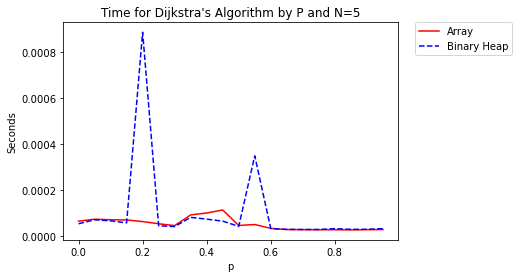

In [12]:
array, heap = create_graph(5)

# N = 20

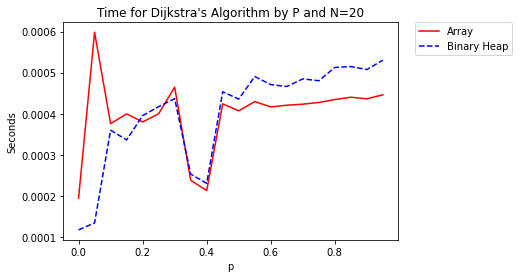

In [13]:
array, heap = create_graph(20)

# N = 50

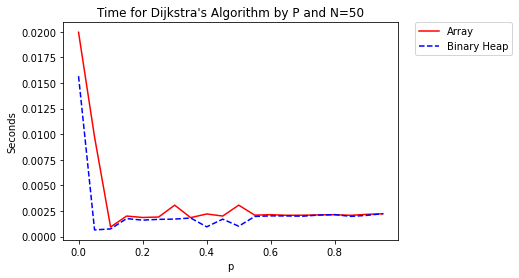

In [14]:
array, heap = create_graph(50)

# N = 250

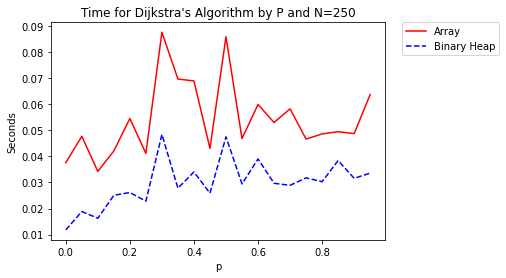

In [15]:
array, heap = create_graph(250)

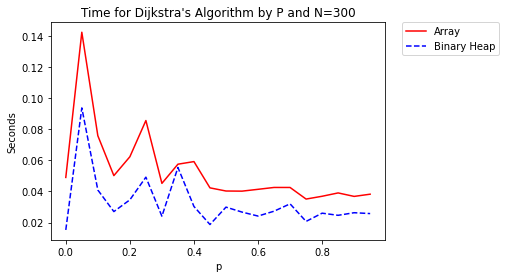

In [16]:
array, heap = create_graph(300)

# N = 1000

p = 0.25
p = 0.5
p = 0.75


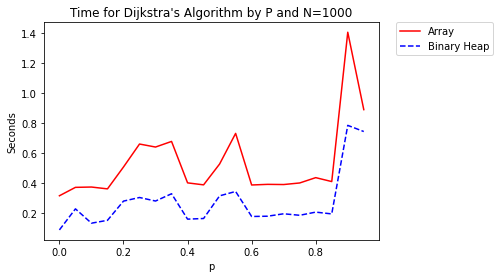

In [17]:
array1000, heap1000 = create_graph(1000)

# N = 5000

p = 0.25
p = 0.5
p = 0.75


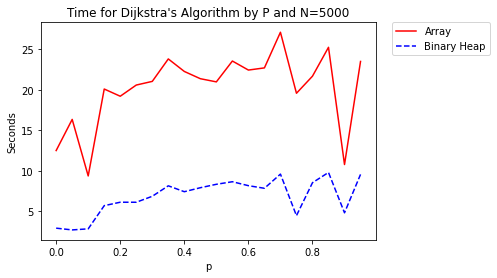

In [18]:
array5000, heap5000 = create_graph(5000)